In [0]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

In [0]:
!apt-get install -y python-numpy python-dev cmake zlib1g-dev libjpeg-dev xvfb libav-tools xorg-dev python-opengl libboost-all-dev libsdl2-dev swig

In [3]:
!pip install gym
!pip install keras

    100% |████████████████████████████████| 112kB 2.4MB/s 
    100% |████████████████████████████████| 1.0MB 1.1MB/s 
  Running setup.py bdist_wheel for gym ... - done
  Stored in directory: /content/.cache/pip/wheels/93/f6/46/14486105f38feb8e724664d067d35328b2ddefbfc09d094496
Successfully built gym
    100% |████████████████████████████████| 327kB 2.2MB/s 


#### Kütüphanelerin İmport Edilmesi

In [4]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Conv2D,MaxPool2D, Dense
from keras.layers import Dropout, Activation , Flatten
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import random

%matplotlib inline

Using TensorFlow backend.


#### Kod Başlangıcı

In [5]:

NUM_CLASSES=10   # 10 Kategori olduğu için.

(X_train, y_train), (X_test, y_test) = cifar10.load_data()# Datayı yüklüyoruz.İndiriyoruz.

170508288/170498071 [==============================] - 31s 0us/step


In [0]:
TYPE_MAP = {
    0: u'Uçak',
    1: 'Otomobil',
    2: u'Kuş',
    3: 'Kedi',
    4: 'Geyik',
    5: u'Köpek',
    6: u'Kurbağa',
    7: 'At',
    8: 'Gemi',
    9: 'Kamyon'
} # Verilerin içerisinde ki isimlendirmeler. https://www.kaggle.com/c/cifar-10/data

In [0]:
X_train = X_train.astype('float32') / 225.0   # Veri tiplerini sıfır ile bir arasına çekmemize yarıyor.
X_test = X_test.astype('float32') / 225.0

y_train = keras.utils.to_categorical(y_train,NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test,NUM_CLASSES)

Resmin Cinsi : Kurbağa


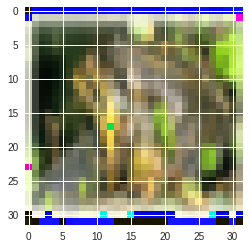

In [8]:
dataset_size = X_train.shape[0]

idx = random.randint(0, dataset_size)

sample_img = X_train[idx]
sample_label= np.argmax(y_train[idx])

print(u"Resmin Cinsi : %s" % TYPE_MAP[sample_label]) # Rasgele çektiğimiz resmin ne olduğu ile birlikte aşağıda göstertiyoruz. Daha eğitim yapmadık.Sadece dataya bakiyoruz.
plt.imshow(sample_img)

In [0]:
input_shape = X_train.shape[1:]

model = Sequential()

model.add(Conv2D(32,(5,5),padding ='same',input_shape=input_shape)) # 5x5x32'lik bir Conv uyguluyoruz.
model.add(Activation('relu')) # Activasyon fonksiyonu relu. 

model.add(Conv2D(32, (3, 3)))# 3x3x32'lik bir Conv yapıyoruz.
model.add(MaxPool2D(pool_size=(2,2))) # 2x2 'lik bir  max pool yaparak veriyi daha aza indirgiyoruz.
model.add(Activation('relu'))
model.add(Dropout(0.25)) # Rasgele olarak verilerin bazılarını sıfıra çekiyor.

model.add(Conv2D(64,(3,3),padding='same')) # 3x3x64'lük bir Conv işlemi. padding var.
model.add(Activation('relu')) # Activatiyonu relu

model.add(Conv2D(64,(3,3))) # 3x3x64'lük bir conv işlemi paddingsiz
model.add(MaxPool2D(pool_size=(2,2)))# 2x2'lik maxpool
model.add(Dropout(0.5)) # Dropout

model.add(Flatten()) # Bu katman tek dikey bir dizi şeklini aldırıyor çikişlarımızın
model.add(Dense(1024,activation='relu')) # Hidden Layer
model.add(Dropout(0.25))


model.add(Dense(NUM_CLASSES,activation='softmax'))  # Softmax ile çikişi gösteriyoruz.

model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adadelta(),metrics=['accuracy']) # Optimizer ile hatayi daha aza indirgeme işlemi yapıyoruz. Adadelta kullandığımız algortima Adam vb de kullanılabilir.

In [10]:
model.fit(X_train, y_train, batch_size=512, epochs=10,verbose=1,validation_data=(X_test, y_test),shuffle=True)  # Batch_size Her iterasyonda kaç resim göndereceğimiz.Fazla resim göndermek doğrulu arttırsada ezberide arttırıyor.İdeal 128 256 gibi. Epoch iterasyon kaç kere yapılcak bu.Validation= doğruluk teste göre oranlicak

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 14s 277us/step - loss: 2.1643 - acc: 0.2087 - val_loss: 1.8052 - val_acc: 0.3532
Epoch 2/10
50000/50000 [==============================] - 11s 228us/step - loss: 1.8168 - acc: 0.3589 - val_loss: 1.7215 - val_acc: 0.3939
Epoch 3/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.5856 - acc: 0.4331 - val_loss: 1.4061 - val_acc: 0.5025
Epoch 4/10
14848/50000 [=======>......................] - ETA: 7s - loss: 1.4650 - acc: 0.4758

50000/50000 [==============================] - 11s 227us/step - loss: 1.4498 - acc: 0.4841 - val_loss: 1.2956 - val_acc: 0.5454
Epoch 5/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.3495 - acc: 0.5196 - val_loss: 1.2810 - val_acc: 0.5497
Epoch 6/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.2765 - acc: 0.5463 - val_loss: 1.2218 - val_acc: 0.5640
Epoch 7/10
37376/50000 [=====================>........] - ETA: 2s - loss: 1.2046 - acc: 0.5749

50000/50000 [==============================] - 11s 227us/step - loss: 1.1969 - acc: 0.5767 - val_loss: 1.0864 - val_acc: 0.6155
Epoch 8/10
50000/50000 [==============================] - 11s 228us/step - loss: 1.1181 - acc: 0.6054 - val_loss: 1.0759 - val_acc: 0.6232
Epoch 9/10
50000/50000 [==============================] - 11s 227us/step - loss: 1.0660 - acc: 0.6248 - val_loss: 0.9620 - val_acc: 0.6665
Epoch 10/10
40960/50000 [=======================>......] - ETA: 1s - loss: 1.0017 - acc: 0.6476

50000/50000 [==============================] - 11s 227us/step - loss: 0.9960 - acc: 0.6507 - val_loss: 1.0693 - val_acc: 0.6157


In [12]:
model.evaluate(X_test,y_test, verbose=1) # Modelin değerlendirmesini yapıyor.Valitadon???.

10000/10000 [==============================] - 2s 175us/step


[1.0693060401916503, 0.6157]

Resmin Cinsi : Kuş
Resim Uçak olma ihtimali : 0.06%
Resim Otomobil olma ihtimali : 0.00%
Resim Kuş olma ihtimali : 56.69%
Resim Kedi olma ihtimali : 1.31%
Resim Geyik olma ihtimali : 24.13%
Resim Köpek olma ihtimali : 0.09%
Resim Kurbağa olma ihtimali : 17.67%
Resim At olma ihtimali : 0.03%
Resim Gemi olma ihtimali : 0.01%
Resim Kamyon olma ihtimali : 0.01%


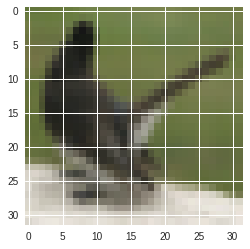

In [21]:
idx = random.randint(0, X_test.shape[0])# Rasgele resim seçiyoruz

sample_img= X_test[idx]
sample_label = np.argmax(y_test[idx])

print(u"Resmin Cinsi : %s" % TYPE_MAP[sample_label] ) # Rasgele resimin ne olduğunu veya söylediğini gösteriyoruz
plt.imshow(sample_img)

sample_img= sample_img.reshape(1, 32, 32 ,3) # 32 32 Boyutunda olduğu için ve RGB olduğundan 3 diyoruz.

for i, v in enumerate(model.predict(sample_img)[0]): # Resimin kaç ihtimalle olduğunu yazdiriyoruz.
  print(u"Resim %s olma ihtimali : %.2f%%" % (TYPE_MAP[i],v *100)) # İhtimallini yansıtıyoruz i değişkeni diğer kategorilere göre de ihtimalleri göstermemize yariyor.

In [0]:
model.save('cifar10-cnn.h5') # Eğitilmiş verileri kaydetmek için Drive'a direkt kaydediyor.

In [0]:
model.load_weights('cifar10-cnn.h5') # Eğitilmiş ağırlıkları yüklemek için.

In [1]:
!ls

datalab


In [24]:
model.summary() # modelimizin akış seması diyebiliriz diyagramı ve parametre sayıları.

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        2432      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
activation_2 (Activation)    (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 64)        18496     
__________